<a href="https://colab.research.google.com/github/wadaxy/artificial-intelligence-with-python-ja/blob/master/notebooks/ch02_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2章 PyTorch入門

In [1]:
# 必要ライブラリの導入

!pip install japanize_matplotlib | tail -n 1
!pip install torchviz | tail -n 1

In [2]:
# 必要ライブラリのインポート

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
from IPython.display import display

In [3]:
# デフォルトフォントサイズ変更
plt.rcParams['font.size'] = 14

# デフォルトグラフサイズ変更
plt.rcParams['figure.figsize'] = (6,6)

# デフォルトで方眼表示ON
plt.rcParams['axes.grid'] = True

## 2.2 テンソル

### ライブラリインポート

In [4]:
# PyTorchライブラリ

import torch

### いろいろな階数のTensorを作る

In [5]:
# 0階テンソル (スカラー)
# floatは必ずつけて、dtype(テンソル変数の要素のデータ型)をfloat32に変換しておく
# これを忘れると、dtypeがfloat64になり、nn.Linearなど機械学習ライブラリーでエラーになってしまう。
r0 = torch.tensor(1.0).float()

# typeを調べる
print(type(r0))

# dtypeを調べる
print(r0.dtype)

<class 'torch.Tensor'>
torch.float32


In [6]:
# shapeを調べる
# shapeとは要素数のことである
print(r0.shape)

# データを調べる
print(r0.data)

torch.Size([])
tensor(1.)


In [7]:
# 1階テンソル (ベクトル)

# 1階のNumPy変数作成
r1_np = np.array([1, 2, 3, 4, 5])
print(r1_np.shape)

# NumPyからテンソルに変換
r1 = torch.tensor(r1_np).float()

# dtypeを調べる
print(r1.dtype)

# shapeを調べる
print(r1.shape)

# データを調べる
# 純粋に数値だけにしたい場合
print(r1.data)

(5,)
torch.float32
torch.Size([5])
tensor([1., 2., 3., 4., 5.])


In [8]:
# 2階テンソル (行列)

# 2階のNmPy変数作成
r2_np = np.array([[1, 5, 6], [4, 3, 2]])
print(r2_np.shape)

# NumPyからテンソルに変換
r2 = torch.tensor(r2_np).float()

# shapeを調べる
print(r2.shape)

# データを調べる
print(r2.data)

(2, 3)
torch.Size([2, 3])
tensor([[1., 5., 6.],
        [4., 3., 2.]])


In [9]:
# ３階テンソル

# 乱数seedの初期化
torch.manual_seed(123)

# shape=[3,2,2]の正規分布変数テンソルを作る
r3 = torch.randn((3, 2, 2))

# shapeを調べる
print(r3.shape)

# データを調べる
print(r3.data)

torch.Size([3, 2, 2])
tensor([[[-0.1115,  0.1204],
         [-0.3696, -0.2404]],

        [[-1.1969,  0.2093],
         [-0.9724, -0.7550]],

        [[ 0.3239, -0.1085],
         [ 0.2103, -0.3908]]])


In [10]:
# 4階テンソル

# shape=[2,3,2,2]の要素がすべて1のテンソルを作る
r4 = torch.ones((2, 3, 2, 2))

# shapeを調べる
print(r4.shape)

# データを調べる
print(r4.data)

torch.Size([2, 3, 2, 2])
tensor([[[[1., 1.],
          [1., 1.]],

         [[1., 1.],
          [1., 1.]],

         [[1., 1.],
          [1., 1.]]],


        [[[1., 1.],
          [1., 1.]],

         [[1., 1.],
          [1., 1.]],

         [[1., 1.],
          [1., 1.]]]])


### 整数型テンソルを作る

In [11]:
# 多値分類用損失関数の呼び出しの際に整数型を指定する必要がある
r5 = r1.long()

# dtype　を確認
print(r5.dtype)

# 値を確認
print(r5)

torch.int64
tensor([1, 2, 3, 4, 5])


### view関数

In [12]:
# 2階化
# 要素数に-1を指定すると、この数を自動調整する
#
#  r3 = tensor([[[-0.1115,  0.1204],
#                [-0.3696, -0.2404]],
#
#               [[-1.1969,  0.2093],
#                [-0.9724, -0.7550]],
#
#               [[ 0.3239, -0.1085],
#                [ 0.2103, -0.3908]]])

#  3回テンソルを2(-1)階テンソルにする
r6 = r3.view(3, -1)

# shape確認
print(r6.shape)

# 値確認
print(r6.data)

torch.Size([3, 4])
tensor([[-0.1115,  0.1204, -0.3696, -0.2404],
        [-1.1969,  0.2093, -0.9724, -0.7550],
        [ 0.3239, -0.1085,  0.2103, -0.3908]])


In [13]:
# 1階化
# 要素数に-1を指定すると、この数を自動調整する

r7 = r3.view(-1)

# shape確認
print(r7.shape)

# 値確認
print(r7.data)

torch.Size([12])
tensor([-0.1115,  0.1204, -0.3696, -0.2404, -1.1969,  0.2093, -0.9724, -0.7550,
         0.3239, -0.1085,  0.2103, -0.3908])


### それ以外の属性

In [14]:
# requires_grad属性
# 自動微分機能と関係（2.3節）
print('requires_grad: ', r1.requires_grad)

# device属性
# GPU計算と関係（8章）
print('device: ', r1.device)

requires_grad:  False
device:  cpu


### item関数

In [15]:
# スカラーテンソル(0階テンソル)に対してはitem関数で値を取り出せる
# 計算結果テンソルとしてのLOSS(損失)から、データ記録用に値だけを抽出する場合によく用いる

item = r0.item()

print(type(item))
print(item)

<class 'float'>
1.0


In [16]:
# 0階以外のテンソルにitem関数は無効
# r1_np = np.array([1, 2, 3, 4, 5])

print(r1.item())

RuntimeError: a Tensor with 5 elements cannot be converted to Scalar

In [17]:
# 要素数が1つだけの1階テンソルはOK
# (2階以上でも同様)
t1 = torch.ones(1)

# shape確認
print(t1.shape)

# item関数呼び出し
print(t1.item())

torch.Size([1])
1.0


### max関数

In [18]:
# 元テンソルr2の確認
print(r2)

# max関数を引数なしで呼び出すと、全体の最大値が取得できる
print(r2.max())

tensor([[1., 5., 6.],
        [4., 3., 2.]])
tensor(6.)


In [19]:
# torch.max関数
# 2つめの引数はどの軸で集約するかを意味する
# 二階テンソルの場合：
# 軸=1は行方向の集計  軸0は列方向の集計を意味する
print(torch.max(r2, 1))

torch.return_types.max(
values=tensor([6., 4.]),
indices=tensor([2, 0]))


In [20]:
# 何番目の要素が最大値をとるかは、indicesを調べればいい
# 以下の計算は、多値分類で予測ラベルを求めるときによく利用されるパターン
# [1]を付けると、indexのみを抽出できる
print(torch.max(r2, 1)[1])

tensor([2, 0])


### NumPy変数への変換

In [21]:
# NumPy化
# r2はテンソルである
r2_np = r2.data.numpy()

# type 確認
print(type(r2_np))

# 値確認
print(r2_np)

<class 'numpy.ndarray'>
[[1. 5. 6.]
 [4. 3. 2.]]


## 2.4 ２次関数の勾配計算

 ### データ準備

In [36]:
# xをnumpy配列で定義
#
x_np = np.arange(-2, 2.1, 0.25)

# xの値表示
print(x_np)

[-2.   -1.75 -1.5  -1.25 -1.   -0.75 -0.5  -0.25  0.    0.25  0.5   0.75
  1.    1.25  1.5   1.75  2.  ]


In [37]:
# (1) 勾配計算用変数の定義
x = torch.tensor(x_np, requires_grad=True,
    dtype=torch.float32)

# 結果確認
print(x)

tensor([-2.0000, -1.7500, -1.5000, -1.2500, -1.0000, -0.7500, -0.5000, -0.2500,
         0.0000,  0.2500,  0.5000,  0.7500,  1.0000,  1.2500,  1.5000,  1.7500,
         2.0000], requires_grad=True)


### ２次関数の計算

In [38]:
# 2次関数の計算
# 裏で計算グラフが自動生成される

y = 2 * x**2 + 2

$ y = 2x^2 + 2$ を意味する

In [39]:
# yの計算結果確認

print(y)

tensor([10.0000,  8.1250,  6.5000,  5.1250,  4.0000,  3.1250,  2.5000,  2.1250,
         2.0000,  2.1250,  2.5000,  3.1250,  4.0000,  5.1250,  6.5000,  8.1250,
        10.0000], grad_fn=<AddBackward0>)


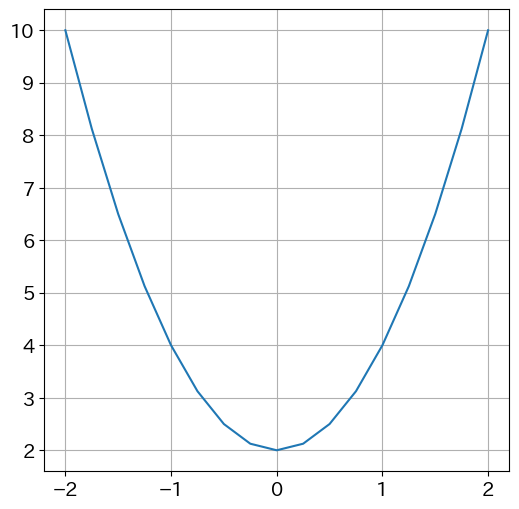

In [40]:
# グラフ描画

plt.plot(x.data, y.data)
plt.show()

In [41]:
# 勾配計算のため、sum 関数で 1階テンソルの関数値をスカラー化する
# (sum 関数を各要素で偏微分した結果は1なので、元の関数の微分結果を取得可能 )
# ( 詳細はサポートサイトの解説を参照のこと )

z = y.sum()

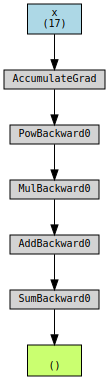

In [42]:
# (3) 計算グラフの可視化

# 必要ライブラリのインポート
from torchviz import make_dot

# 可視化関数の呼び出し
# z: 可視化したい計算グラフの対象となる変数
# x: 第二引数のparamsとして微分計算対象の変数
# xはテンソルではなく、普通のNumPy変数と考えれば良い
g= make_dot(z, params={'x': x})
display(g)

In [43]:
# (4) 勾配計算
# PyTorchの機能を使うと勾配計算の実施はとても簡単で、結果変数zに対してBackward関数を呼び出すだけ

z.backward()

In [44]:
# (5) 勾配値の取得

print(x.grad)

tensor([-8., -7., -6., -5., -4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.,  5.,
         6.,  7.,  8.])


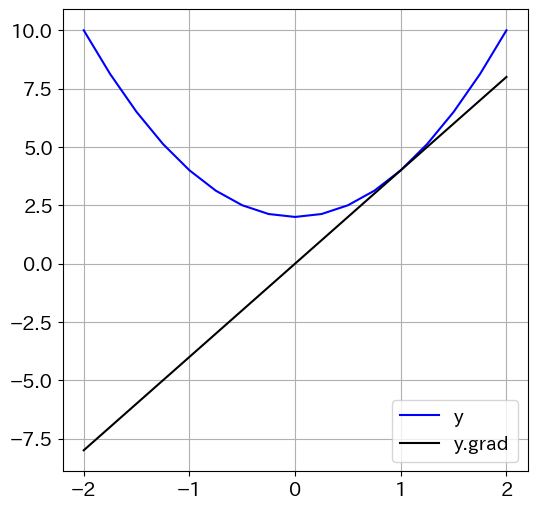

In [32]:
# 元の関数と勾配のグラフ化

plt.plot(x.data, y.data, c='b', label='y')
plt.plot(x.data, x.grad.data, c='k', label='y.grad')
plt.legend()
plt.show()

元の関数が2次関数なので、勾配計算の結果が直線になるのは、妥当な結果

ここでもう一度勾配計算をしてみる。

In [45]:
# 勾配の初期化せずに２度目の勾配計算

y = 2 * x**2 + 2
z = y.sum()
z.backward()

# xの勾配確認
print(x.grad)

tensor([-16., -14., -12., -10.,  -8.,  -6.,  -4.,  -2.,   0.,   2.,   4.,   6.,
          8.,  10.,  12.,  14.,  16.])


勾配値は、勾配計算の結果がどんどん加算されてしまう。そのため新しい値を計算したい場合、勾配値のリセットが必要。

In [46]:
# (6) 勾配の初期化は関数 zero_()を使う
# grad属性に保存されている勾配値は、利用が終わったら値を初期化する必要がある

x.grad.zero_()
print(x.grad)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])


## 2.5 シグモイド関数の勾配計算

シグモイド関数は数式で表すと次の形になるが今回はPyTorchで提供されている関数を利用する  
$ y = \dfrac{1}{1 + \exp{(-x)}} $

In [47]:
# シグモイド関数の定義
sigmoid = torch.nn.Sigmoid()

In [48]:
# (2) yの値の計算

y = sigmoid(x)

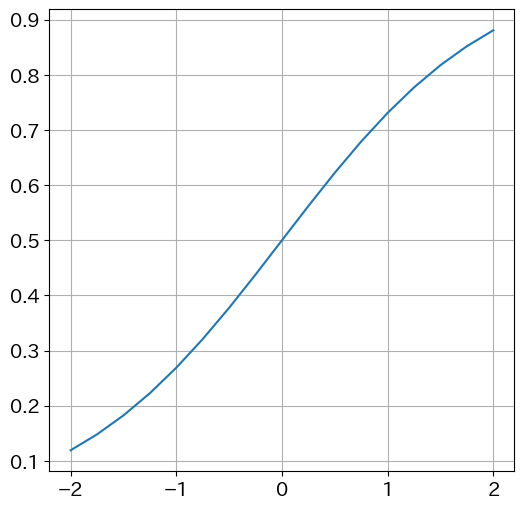

In [49]:
# グラフ描画

plt.plot(x.data, y.data)
plt.show()

In [50]:
# 勾配計算のためには、最終値はスカラーの必要があるため、ダミーでsum関数をかける

z = y.sum()

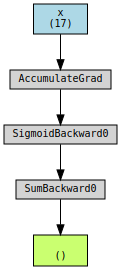

In [51]:
# (3) 計算グラフの可視化

g = make_dot(z, params={'x': x})
display(g)

In [52]:
# (4) 勾配計算
z.backward()

# (5) 勾配値の確認
print(x.grad)

tensor([0.1050, 0.1261, 0.1491, 0.1731, 0.1966, 0.2179, 0.2350, 0.2461, 0.2500,
        0.2461, 0.2350, 0.2179, 0.1966, 0.1731, 0.1491, 0.1261, 0.1050])


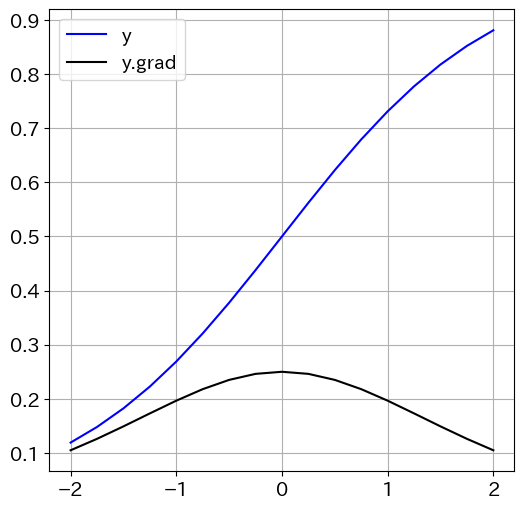

In [53]:
# 元の関数と勾配のグラフ化

plt.plot(x.data, y.data, c='b', label='y')
plt.plot(x.data, x.grad.data, c='k', label='y.grad')
plt.legend()
plt.show()

シグモイド関数の勾配は、$y(1-y)$になる。  
2次関数なので、$y=\dfrac{1}{2}$の時(x=0の時)最大値$\dfrac{1}{4}$を取る。  
上のグラフは、この計算結果と一致している。  

In [54]:
# (6) 勾配の初期化は関数 zero_()を使う

x.grad.zero_()
print(x.grad)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])


### (参考)シグモイド関数を独自に実装した場合

In [55]:
# シグモイド関数の定義

def sigmoid(x):
    return(1/(1 + torch.exp(-x)))

In [56]:
# (2) yの値の計算

y = sigmoid(x)

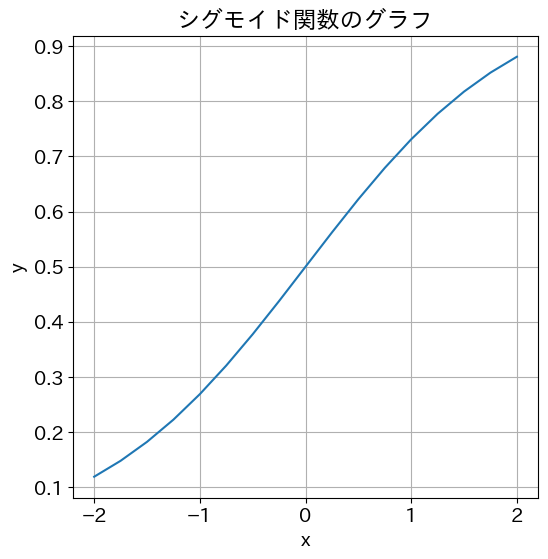

In [57]:
# グラフ描画

plt.plot(x.data, y.data)
plt.xlabel('x')
plt.ylabel('y')
plt.title('シグモイド関数のグラフ')
plt.show()

In [58]:
# 勾配計算のためには、最終値はスカラーの必要があるため、ダミーでsum関数をかける

z = y.sum()

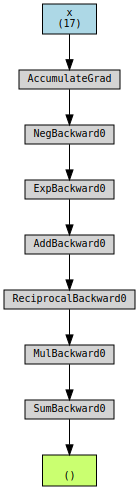

In [59]:
# (3) 計算グラフの可視化

params = {'x': x}
g = make_dot(z, params=params)
display(g)

In [60]:
# (4) 勾配計算
z.backward()

# (5) 勾配値の確認
print(x.grad)

tensor([0.1050, 0.1261, 0.1491, 0.1731, 0.1966, 0.2179, 0.2350, 0.2461, 0.2500,
        0.2461, 0.2350, 0.2179, 0.1966, 0.1731, 0.1491, 0.1261, 0.1050])


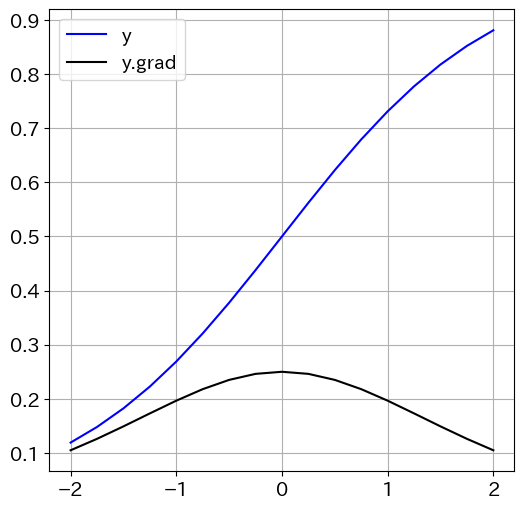

In [61]:
# 元の関数と勾配のグラフ化

plt.plot(x.data, y.data, c='b', label='y')
plt.plot(x.data, x.grad.data, c='k', label='y.grad')
plt.legend()
plt.show()